# Una semplice implementazione di un classificatore binario lineare ("_perceptron_")
Luca Mari, febbraio 2023

Il percettrone (in inglese "_perceptron_") fu proposto come modello matematico di un neurone da McCulloch e Pitts nel 1943 e implementato per la prima volta da Rosenblatt nel 1958 (https://it.wikipedia.org/wiki/Percettrone).

L'esempio di un problema che questo sistema è in grado di risolvere:
* sono dati dei punti sul piano $X,Y$, ognuno di essi di colore bianco ($1$) o nero ($0$), e sotto l'ipotesi che punti di colori diversi stanno in parti diverse del piano;
* è dato un insieme di questi punti, di cui è nota sia la posizione nel piano sia il colore (dunque sia le coordinate $x,y$, sia il classificatore, $0$ o $1$: il _training set_);
* dato un nuovo insieme di punti, di cui è nota la posizione nel piano ma non il colore (il _test set_), si vuole che il classificatore proponga un'ipotesi sul colore di ognuno di questi punti (in effetti, conosciamo anche il colore di questi altri, ma lo usiamo non per classificarli, ma solo per valutare l'accuratezza della classificazione proposta, calcolata semplicemente come la percentuale dei punti classificati correttamente)

Si tratta dunque di un comportamento -- molto semplice -- da classificatore binario, dato che ogni punto candidato viene classificato in una di due categorie, in funzione della sua posizione.

Costruiamo innanzitutto la classe che modella il neurone (`Perceptron`), dotata di tre metodi per:
* classificare dei punti (`classify`);
* imparare dal risultato di una classificazione, modificando i pesi delle connessioni al neurone (`train`);
* valutare l'affidabilità di una classificazione (`evaluate`).

In [47]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, num_input:int=2, threshold:float=0.5, training_sens:float=0.1):
        """Un semplice percettrone (nessun layer nascosto, classificazione 0 / 1).

        Args:
            num_input (int, opzionale): numero di input al neurone (default: 2)
            threshold (float, opzionale): soglia di classificazione (chiamata anche "bias") (default: 0.5)
            training_sens (float, optional): sensibilità del processo di apprendimento (chiamata anche "learning rate") (default: 0.1)"""
        self.num_input = num_input
        self.threshold = threshold
        self.training_sens = training_sens
        self.weights = np.random.random(size=num_input)


    def classify(self, input:np.ndarray) -> int:
        """Classifica il vettore di input ("forward pass").

        Args:
            input (np.ndarray): vettore da classificare

        Returns:
            int: 0 o 1 come risultato della classificazione"""
        return 1 if np.sum(self.weights * input) >= self.threshold else 0


    def train(self, input:np.ndarray, label:int):
        """Addestra il neurone: processo a un passo e un punto ("forward and backward pass").

        Args:
            input (np.ndarray): vettore di addestramento
            label (int): 0 o 1 come risultato atteso ("valore vero") della classificazione"""
        r = self.classify(input)
        if r == 0 and label == 1: self.weights += input * self.training_sens
        if r == 1 and label == 0: self.weights -= input * self.training_sens


    def evaluate(self, proposed:np.ndarray, true:np.ndarray) -> float:
        """Valuta l'accuratezza percentuale delle classificazioni proposte date le classificazioni corrette.

        Args:
            proposed (np.ndarray): vettore delle etichette proposte
            true (np.ndarray): vettore delle etichette corrette

        Returns:
            float: accuratezza percentuale della classificazione"""
        return 100 * (proposed == true).mean()

Costruiamo ora un training set (assumendo per semplicità che la regola di classificazione ci sia nota analiticamente, per esempio se $x+y \ge 0.5$, bianco; altrimenti nero), e visualizziamolo in uno _scatter diagram_.  
Quindi costruiamo un neurone e addestriamolo con questo insieme di dati.

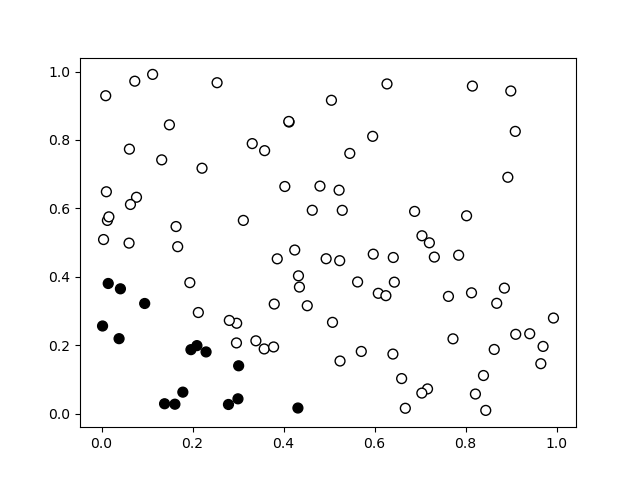

In [62]:
def gen_dataset(size:int=100):
    data = np.random.random(size=(size,2))
    labels = (data[:,0]+data[:,1] >= 0.5).astype(int)
    return data, labels

training_size = 100
data, labels = gen_dataset(training_size)

plt.figure(1)
plt.clf()
plt.scatter(data[:,0],data[:,1], s=50, c=labels, edgecolors='black', cmap='gray')
plt.show()

perceptron = Perceptron()

for i in range(training_size):
    perceptron.train(np.asarray([data[i,0], data[i,1]]), labels[i])

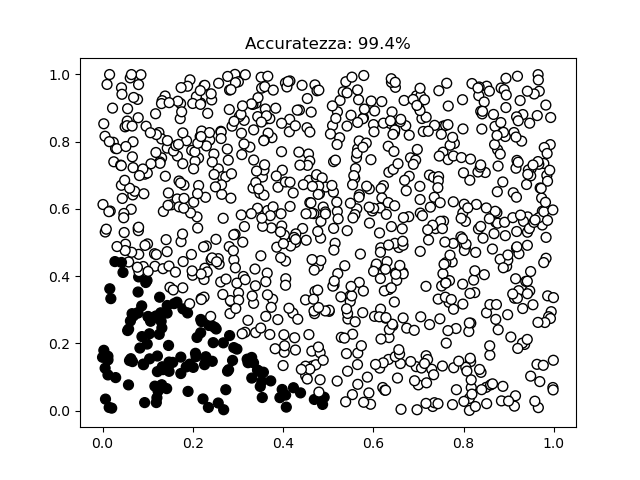

In [73]:
test_size = 1000
data, true_labels = gen_dataset(test_size)

labels = np.zeros(test_size)

for i in range(test_size):
    labels[i] = perceptron.classify(np.asarray([data[i,0], data[i,1]]))

plt.figure(2)
plt.clf()
plt.title(f'Accuratezza: {perceptron.evaluate(labels, true_labels)}%')

plt.scatter(data[:,0],data[:,1], s=50, c=labels, edgecolors='black', cmap='gray')
plt.show()
